# 1)

In [3]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

2023-06-29 16:44:19.785549: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 16:44:19.854423: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 16:44:19.856275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 16:44:20.939980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.12.0
Keras version: 2.12.0


# 2)

In [4]:
import pandas as pd
df = pd.read_csv('wine.csv')
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1599
Number of columns: 12


# 3)

In [5]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
categorical_vars = df.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_vars)

Categorical variables: Index(['quality'], dtype='object')


In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_vars)

# 4)

In [8]:
target_variable = df.columns[-1]

In [9]:
features = df.drop(target_variable, axis=1)
target = df[target_variable]

# 5)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 6)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 7)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the number of neurons in each layer
input_dim = X_train_scaled.shape[1]  # Number of features

# Create the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(64, activation='relu', input_dim=input_dim))

# Add the second hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# 8)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


# 9)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

# Train the model with the TensorBoard callback
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val_encoded), callbacks=[tensorboard_callback])

Epoch 1/10
32/32 [==============================] - 1s 17ms/step - loss: 0.6299 - accuracy: 0.6500 - val_loss: 0.5972 - val_accuracy: 0.6836
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.5496 - accuracy: 0.7146 - val_loss: 0.5683 - val_accuracy: 0.7305
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5241 - accuracy: 0.7312 - val_loss: 0.5435 - val_accuracy: 0.7539
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.7498 - val_loss: 0.5514 - val_accuracy: 0.7695
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4978 - accuracy: 0.7605 - val_loss: 0.5458 - val_accuracy: 0.7656
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.7615 - val_loss: 0.5352 - val_accuracy: 0.7812
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4804 - accuracy: 0.7644 - val_loss: 0.5345 - val_accuracy: 0.7734
Epoch 8/10
32/32 [=

# 10)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the EarlyStopping callback
model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val_scaled,y_val_encoded), callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 1s 8ms/step - loss: 0.6285 - accuracy: 0.6559 - val_loss: 0.6200 - val_accuracy: 0.7188
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7380 - val_loss: 0.5690 - val_accuracy: 0.7734
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7478 - val_loss: 0.5451 - val_accuracy: 0.7539
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7546 - val_loss: 0.5525 - val_accuracy: 0.7969
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7605 - val_loss: 0.5340 - val_accuracy: 0.7930
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7674 - val_loss: 0.5321 - val_accuracy: 0.7852
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7732 - val_loss: 0.5313 - val_accuracy: 0.7930
Epoch 8/20
32/32 [==

# 11)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model with the ModelCheckpoint callback
model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val_encoded), callbacks=[checkpoint_callback])


Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 0.6572 - accuracy: 0.6090 - val_loss: 0.6144 - val_accuracy: 0.6836
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.7380 - val_loss: 0.5604 - val_accuracy: 0.7422
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7468 - val_loss: 0.5470 - val_accuracy: 0.7617
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7615 - val_loss: 0.5367 - val_accuracy: 0.7695
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7654 - val_loss: 0.5315 - val_accuracy: 0.7891
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7664 - val_loss: 0.5316 - val_accuracy: 0.7930
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7703 - val_loss: 0.5347 - val_accuracy: 0.7852
Epoch 8/20
32/32 [==

# 12)

In [27]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                768       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


# 13)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                768       
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


# 14)

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with specified loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 15)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Create the Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_dim=input_dim))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model1.h5', monitor='val_accuracy', save_best_only=True)

# Fit the model with callbacks
model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded), callbacks=[tensorboard_callback, early_stopping, model_checkpoint])


Epoch 1/20
32/32 [==============================] - 1s 13ms/step - loss: 0.9143 - accuracy: 0.5924 - val_loss: 0.6305 - val_accuracy: 0.5977
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6374 - accuracy: 0.6393 - val_loss: 0.6381 - val_accuracy: 0.6055
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6284 - accuracy: 0.6471 - val_loss: 0.6898 - val_accuracy: 0.5469
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.6325 - val_loss: 0.6100 - val_accuracy: 0.6094
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6227 - val_loss: 0.6433 - val_accuracy: 0.5625
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6138 - accuracy: 0.6716 - val_loss: 0.6190 - val_accuracy: 0.6406
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6242 - accuracy: 0.6334 - val_loss: 0.6143 - val_accuracy: 0.6094


# 16)

In [32]:
# Get the model's parameters
parameters = model.get_weights()

# Print the model's parameters
for layer_num, layer_params in enumerate(parameters):
    print(f"Layer {layer_num+1} parameters:")
    print(layer_params)
    print()

Layer 1 parameters:
[[-0.06529215  0.14675505 -0.26684782 -0.05319177  0.02629951 -0.04046524
  -0.21842675 -0.10896564  0.1314868  -0.22715817 -0.15379062 -0.24335341
  -0.18235323  0.01316291  0.19251668  0.19084282  0.23212397  0.16424415
  -0.23856698 -0.19817038 -0.23714401 -0.24710323  0.26300082 -0.07135953
  -0.16588412  0.27879834 -0.01062109  0.22423577  0.0242016   0.12766069
   0.00463343 -0.24114819 -0.10495089 -0.1418136   0.17080805  0.01049725
  -0.27811885  0.24688691  0.16879775 -0.01162593 -0.19934297 -0.16670455
   0.2700551   0.12282982  0.09176831  0.07223067 -0.14082079 -0.20804484
  -0.28998595  0.13347542  0.21031256  0.04382663 -0.17392673  0.2776892
  -0.2502486   0.04902461 -0.25448698 -0.15676919  0.10538755  0.2569455
   0.11835559  0.20718928  0.08561242  0.22337858]
 [-0.18302402 -0.30434102 -0.03946082 -0.1249114   0.11126041  0.01491995
   0.2565432   0.22861281 -0.14638066  0.12438259 -0.25537652 -0.10054476
  -0.07687774 -0.21991357  0.04871271 -0.14

# 17)

In [34]:
import pandas as pd
# Fit the model and get the training history
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))

# Store the training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

Epoch 1/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6334 - accuracy: 0.6237 - val_loss: 0.5980 - val_accuracy: 0.6367
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.6549 - val_loss: 0.6046 - val_accuracy: 0.6016
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6422 - val_loss: 0.6270 - val_accuracy: 0.6406
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6608 - val_loss: 0.6053 - val_accuracy: 0.6406
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.6608 - val_loss: 0.6052 - val_accuracy: 0.6094
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.6764 - val_loss: 0.6141 - val_accuracy: 0.6133
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.6725 - val_loss: 0.5978 - val_accuracy: 0.6641
Epoch 8/20
32/32 [==

In [36]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.633426,0.623656,0.597966,0.636719
1,0.618553,0.654936,0.604616,0.601562
2,0.625137,0.642229,0.627003,0.640625
3,0.617798,0.660802,0.605336,0.640625
4,0.596008,0.660802,0.605196,0.609375


# 18)

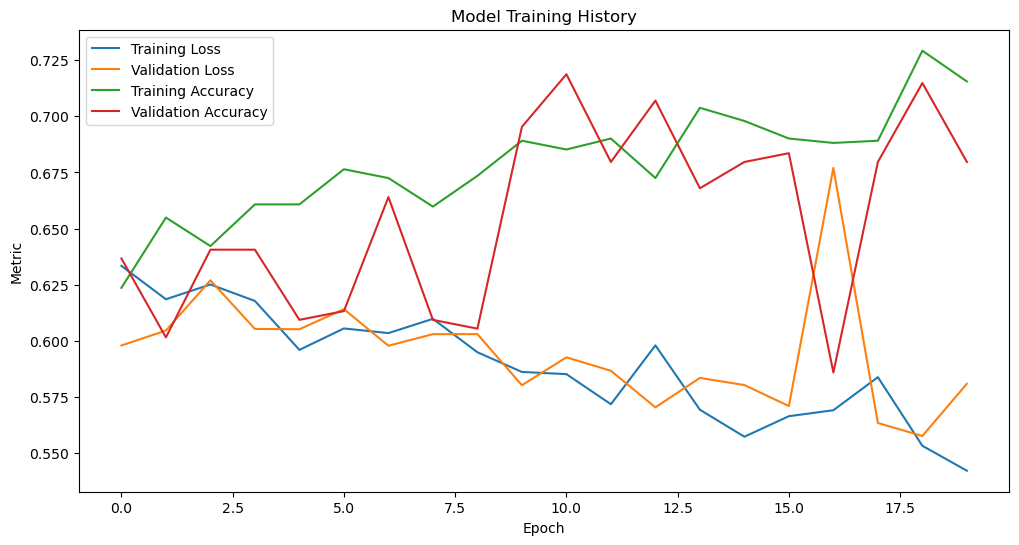

In [38]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Model Training History')
plt.legend()
plt.show()

# 19)

In [40]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7031
Test Loss: 0.5489603281021118
Test Accuracy: 0.703125
